## Machine Learning using Python Exam – Paper 2
#### - Khushboo Dhull

### Part I: Unsupervised Learning

<b>Given the ‘credit_card’ dataset, below is the data definition:
1) CUSTID: Identification of Credit Card holder (Categorical)

2) BALANCE: Balance amount left in their account to make purchases

3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4) PURCHASES: Amount of purchases made from account

5) ONEOFFPURCHASES: Maximum purchase amount done in one-go

6) INSTALLMENTSPURCHASES: Amount of purchase done in installment

7) CASHADVANCE: Cash in advance given by the user

8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one- go (1 = frequently purchased, 0 = not frequently purchased)

10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

13) PURCHASESTRX: Number of purchase transactions made

14) CREDITLIMIT: Limit of Credit Card for user

15) PAYMENTS: Amount of Payment done by user

16) MINIMUM_PAYMENTS: Minimum amount of payments made by user 

17) PRCFULLPAYMENT: Percent of full payment paid by user

18) TENURE: Tenure of credit card service for user


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
df=pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the data

In [3]:
df1=df.copy()
df1.shape

(8950, 18)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df1.dtypes.value_counts()

float64    14
int64       3
object      1
dtype: int64

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [6]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the balance ranges from 0 to 19043.138560, with mean 1564.474828

- Also, the count of Credit_limit, Minimum_payments is less than total which indicates presence of null values.

<b> 2. For getting the statistical summary of categorical features we use the describe(include = object)

In [7]:
df1.describe(include=object)

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.
- Looking at the above statistics we can see that each customer has its own unique cust_id. We can drop this column for further analysis

### Checking For Null Values & Duplicates

In [8]:
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
percent_missing= df1.isnull().sum() * 100 / len(df)
d3=percent_missing[(percent_missing.values>0)]
d3

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

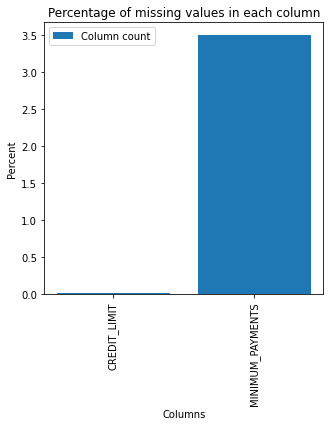

In [10]:
plt.figure(figsize=(5,5))
plt.bar(d3.index,d3.values,label='Column count')
plt.xlabel('Columns')
plt.ylabel('Percent')
plt.legend()
plt.xticks(rotation=90)
plt.title('Percentage of missing values in each column')
plt.show()

In [11]:
df1.duplicated().sum()

0

### Handling Null values

In [12]:
df1['CREDIT_LIMIT'].fillna(df1['CREDIT_LIMIT'].mean(),inplace=True)
df1['MINIMUM_PAYMENTS'].fillna(df1['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [13]:
df1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Purchases by type (one-off, installments)
To find what type of purchases customers are making on credit card

In [14]:
df1.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


### Finding details of customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES

In [15]:
df1[(df1['ONEOFF_PURCHASES']==0) & (df1['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 18)

In [16]:
df1[(df1['ONEOFF_PURCHASES']>0) & (df1['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 18)

In [17]:
df1[(df1['ONEOFF_PURCHASES']>0) & (df1['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 18)

In [18]:
df1[(df1['ONEOFF_PURCHASES']==0) & (df1['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 18)

<b> - As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [19]:
def purchase(df1):
    if (df1['ONEOFF_PURCHASES']==0) & (df1['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df1['ONEOFF_PURCHASES']>0) & (df1['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_&_installment'
    if (df1['ONEOFF_PURCHASES']>0) & (df1['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df1['ONEOFF_PURCHASES']==0) & (df1['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [20]:
df1['purchase_type']=df1.apply(purchase,axis=1)

In [21]:
df1['purchase_type'].value_counts()

both_oneoff_&_installment    2774
installment                  2260
none                         2042
one_off                      1874
Name: purchase_type, dtype: int64

### Limit_usage (balance to credit limit ratio ) credit card utilization
- Lower value implies cutomers are maintaining thier balance properly. Lower value means good credit score

In [22]:
df1['limit_usage']=df1.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [23]:
df1['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

### Payments to minimum payments ratio etc.

In [24]:
df1['payment_minpay']=df1.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

### Graphs for further Analysis

In [25]:
x=df1.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23117631, 13.24507411, 10.07670114,  5.49813638])

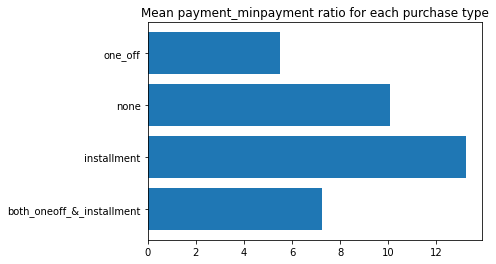

In [26]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchase type')
plt.show()

<AxesSubplot:ylabel='purchase_type'>

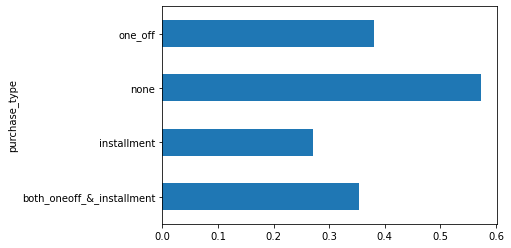

In [27]:
df1.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

<b>- Customers who do installment purchases have better limit score

### Preparing Machine learning algorithm
We do have some categorical data which need to convert with the help of dummies.

In [28]:
cr_log=df1.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [29]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
df1pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [30]:
df1pre['purchase_type']=df1.loc[:,'purchase_type']
pd.get_dummies(df1pre['purchase_type']).head()

,both_oneoff_&_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [31]:
df1_dummy=pd.concat([df1pre,pd.get_dummies(df1pre['purchase_type'])],axis=1)

In [32]:
df1_dummy=df1_dummy.drop('purchase_type',axis=1)
df1_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
limit_usage                         False
payment_minpay                      False
both_oneoff_&_installment           False
installment                         False
none                                False
one_off                             False
dtype: bool

### Segregating numbers and categorical data
#### Numerical Columns

In [33]:
df1=df1_dummy.copy()

In [34]:
df1_numerical= df1.select_dtypes(include='number')

In [35]:
df1.dtypes.value_counts()

float64    11
uint8       4
dtype: int64

#### Boxplots

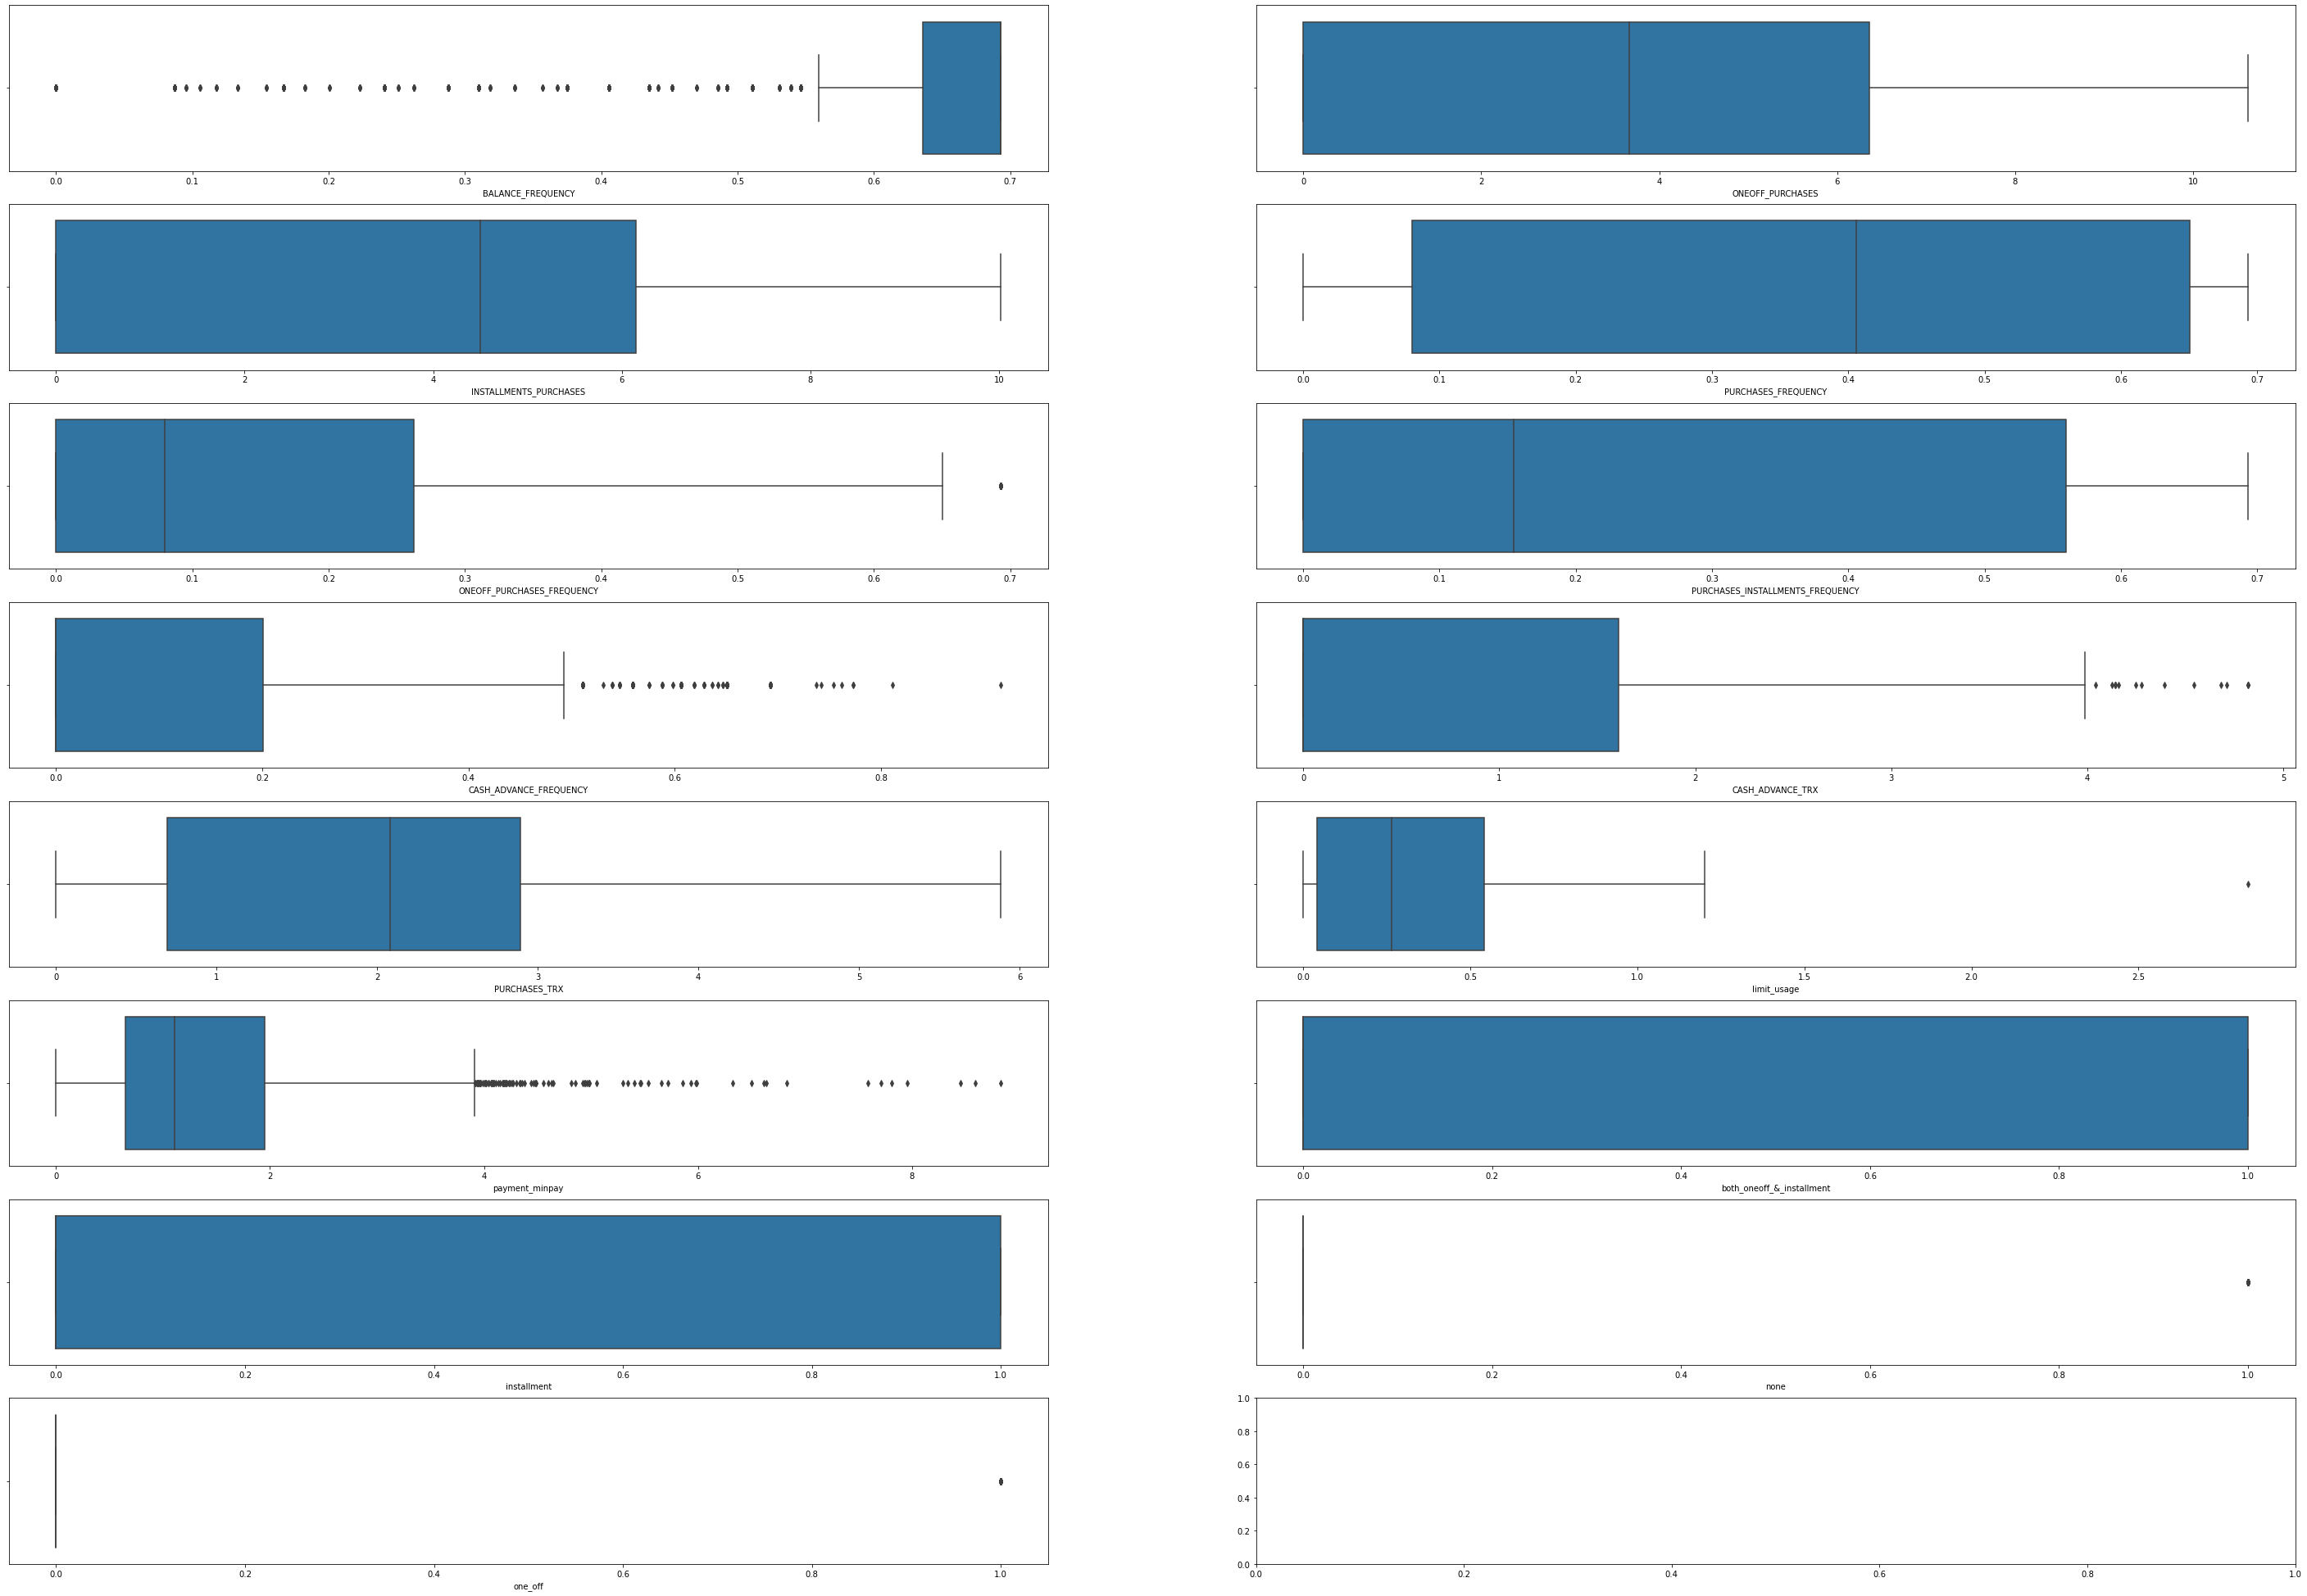

In [36]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize = (50, 35))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1_numerical, ax.flatten()):
    sns.boxplot(df1_numerical[variable], ax = subplot)

- We can see presence of outliers

#### Histogram

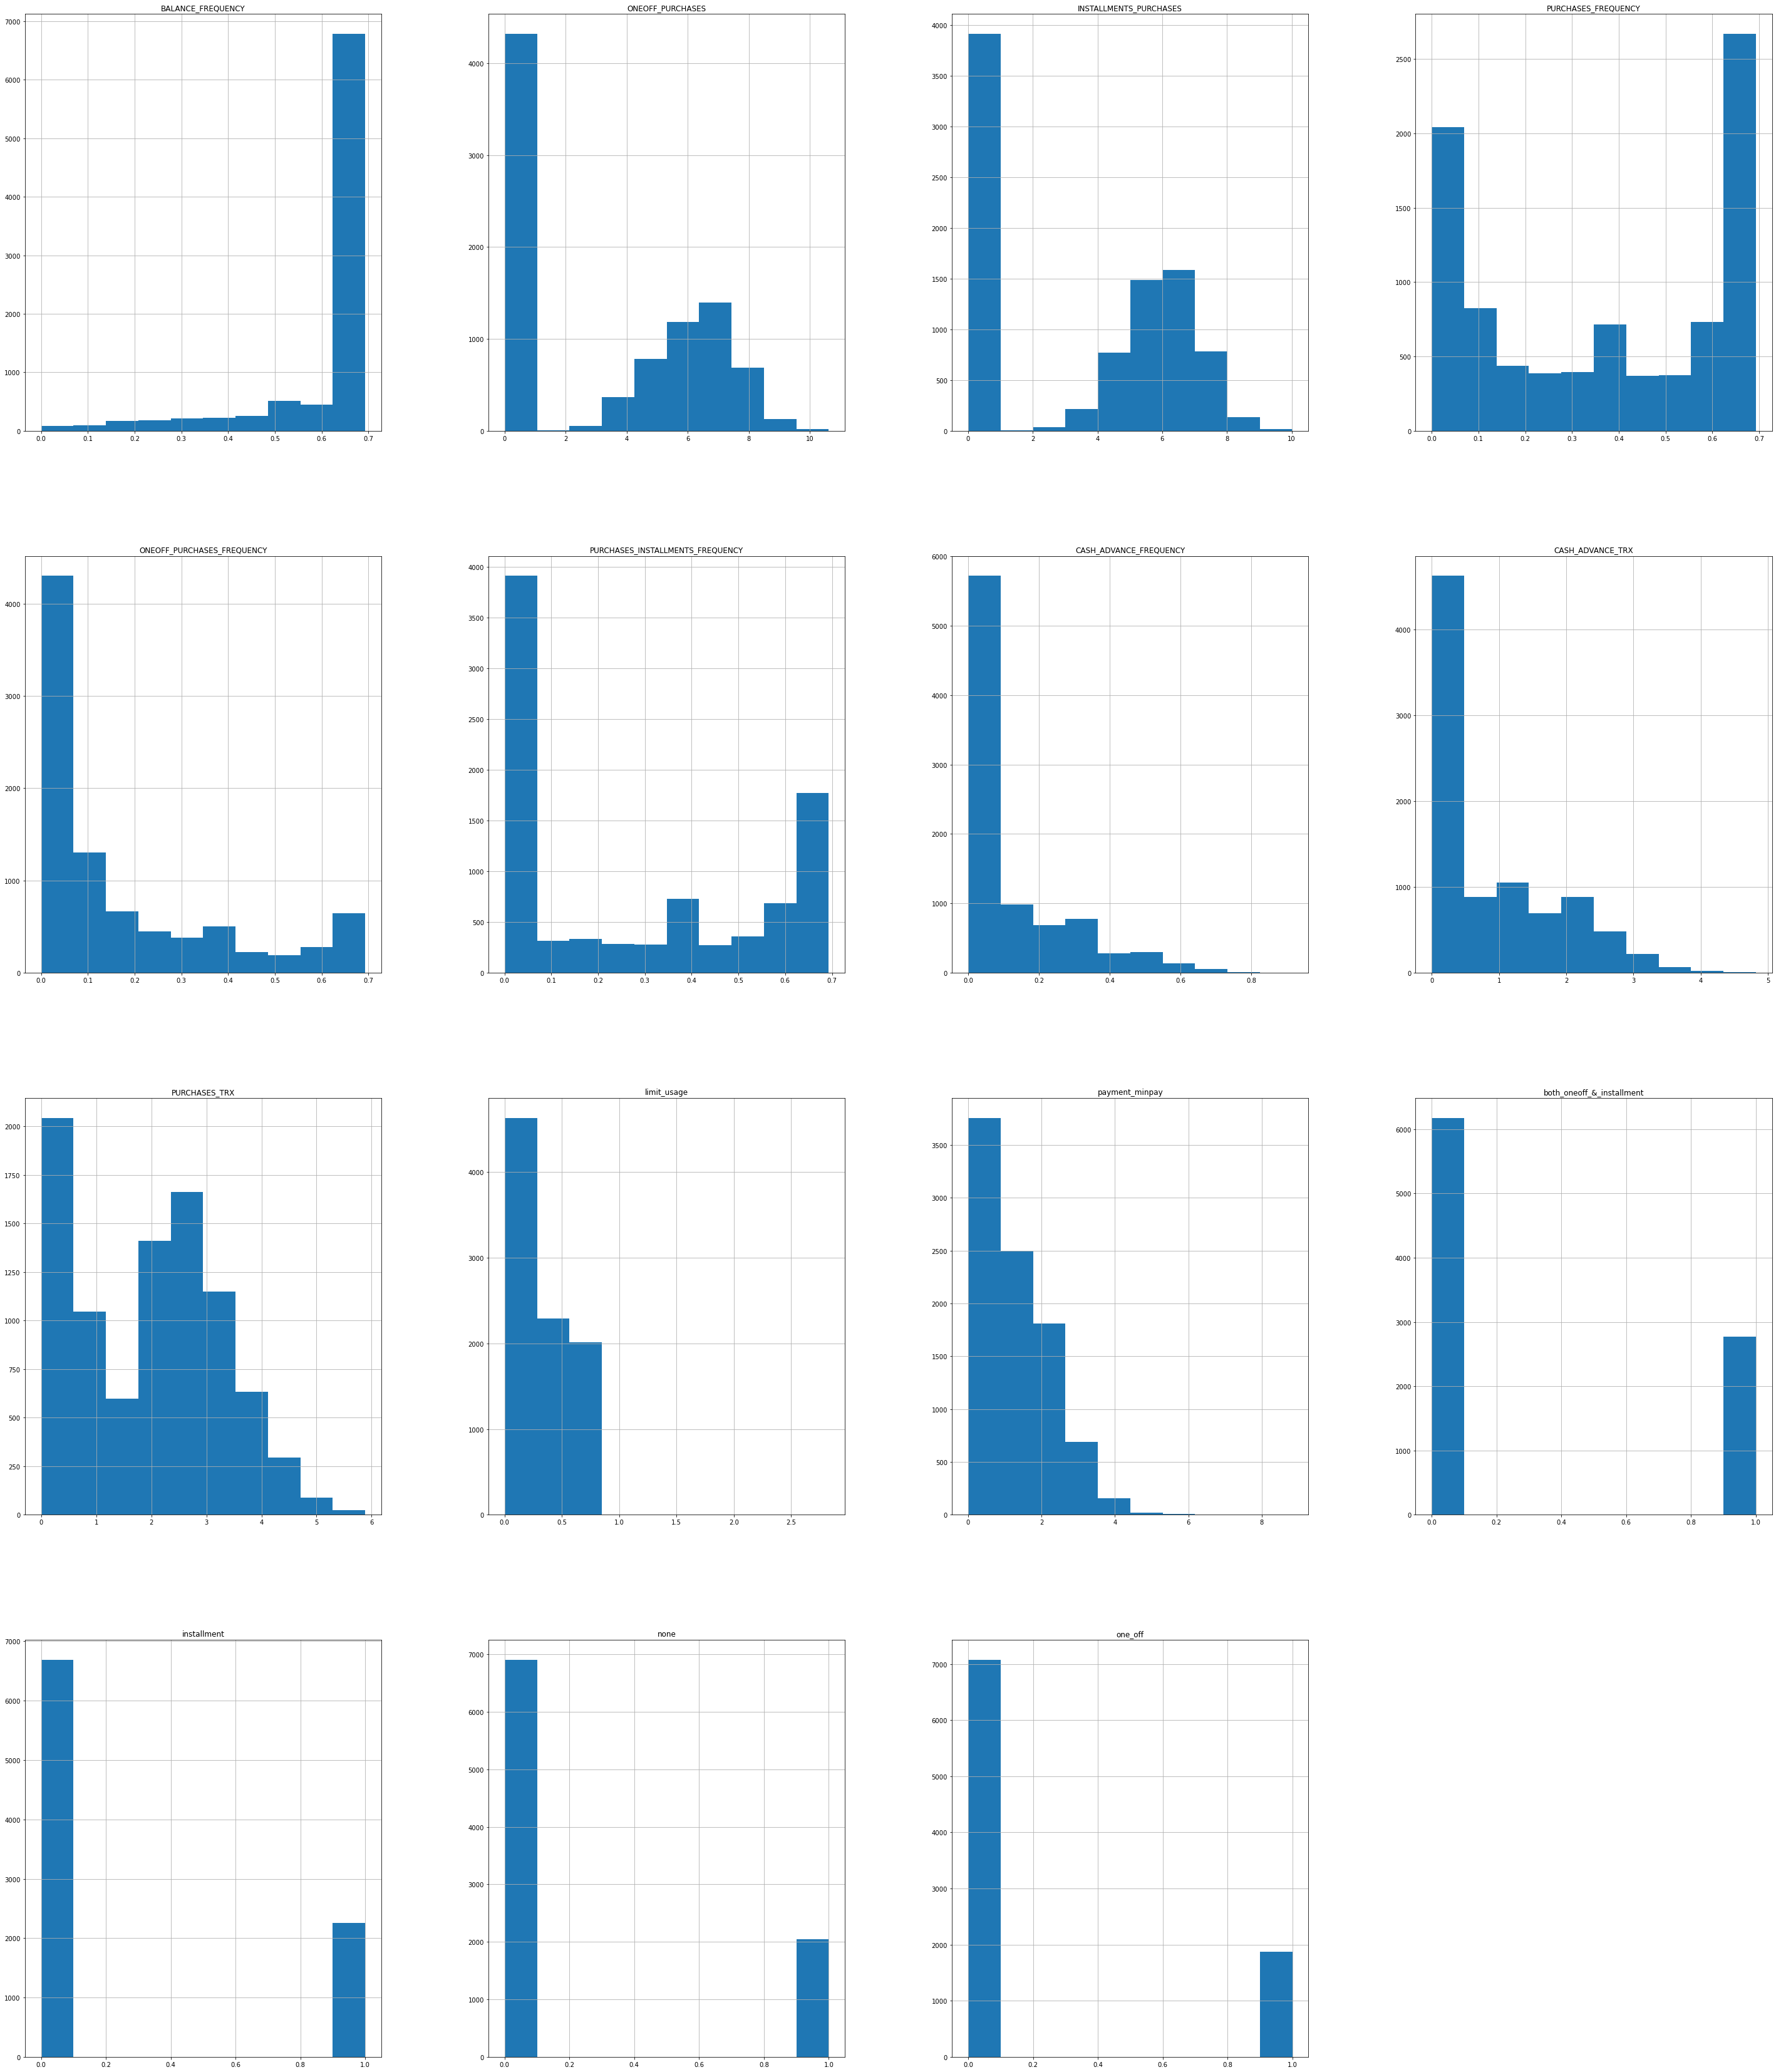

In [37]:
a=df1_numerical.hist(figsize=(50,60))

### Outlier Treatment

In [38]:
df1.describe(percentiles=[0.02,0.98])

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,limit_usage,payment_minpay,both_oneoff_&_installment,installment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,0.296081,1.353976,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.250303,0.940928,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2%,0.154151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000649,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,0.264455,1.104339,0.000000,0.000000,0.000000,0.000000
98%,0.693147,8.396964,7.922400,0.693147,0.693147,0.693147,0.559616,3.178054,4.521789,0.699421,3.596314,1.000000,1.000000,1.000000,1.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


In [39]:
def outlier_handle(x):
    x = x.clip(upper=x.quantile(0.98))
    x = x.clip(lower=x.quantile(0.02))
    return x

In [40]:
df1.shape

(8950, 15)

In [41]:
df1=df1_numerical.apply(outlier_handle)

In [42]:
df1.describe(percentiles=[0.02,0.98])

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,limit_usage,payment_minpay,both_oneoff_&_installment,installment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.621953,3.193542,3.343136,0.361268,0.158699,0.270072,0.112246,0.810449,1.887739,0.294992,1.339358,0.309944,0.252514,0.228156,0.209385
std,0.141234,3.227491,3.067906,0.277317,0.216672,0.281852,0.152590,0.989993,1.358754,0.247242,0.887665,0.462496,0.434479,0.419667,0.406893
min,0.154151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000649,0.000000,0.000000,0.000000,0.000000,0.000000
2%,0.154151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000649,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,0.264455,1.104339,0.000000,0.000000,0.000000,0.000000
98%,0.693147,8.396936,7.922285,0.693147,0.693147,0.693147,0.559616,3.178054,4.521789,0.699418,3.596240,1.000000,1.000000,1.000000,1.000000
max,0.693147,8.396964,7.922400,0.693147,0.693147,0.693147,0.559616,3.178054,4.521789,0.699421,3.596314,1.000000,1.000000,1.000000,1.000000


 ### Correlation

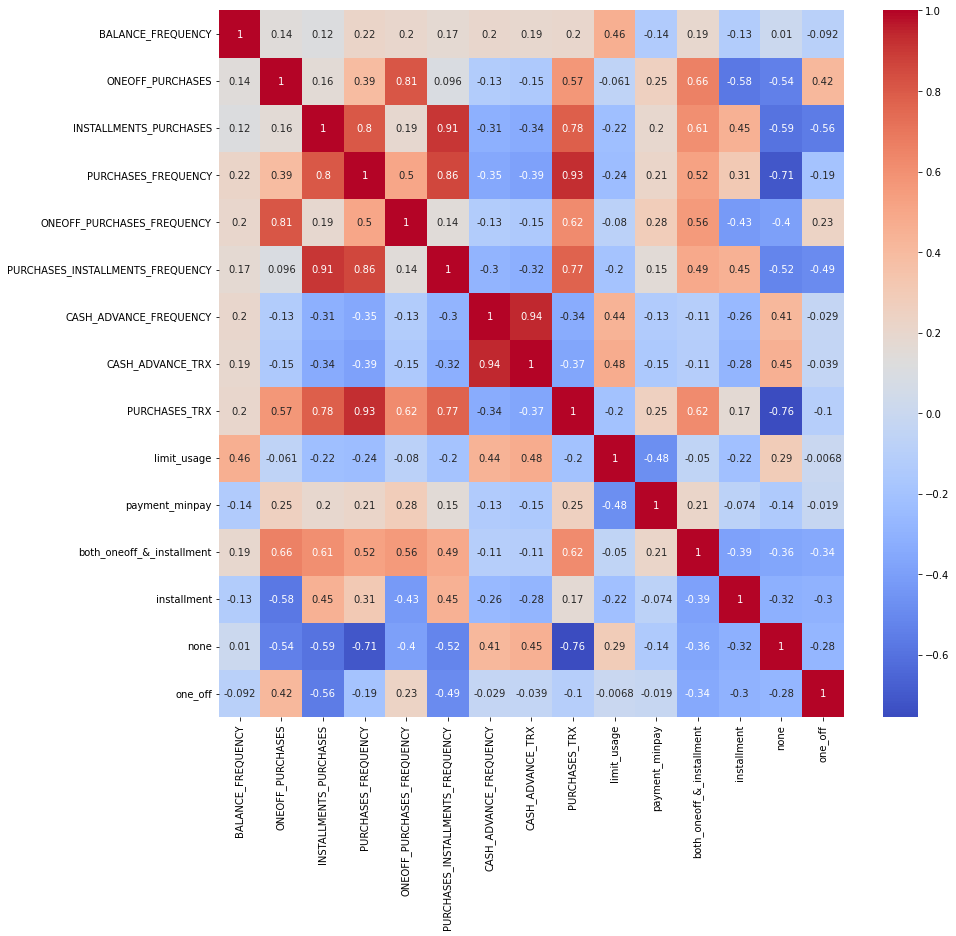

In [43]:
corr = df1.corr()
plt.figure(figsize=(14,13))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [44]:
def high_corr(data, thresh):
    res = set()
    corr = df1.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j] >= thresh:
                res.add(corr.columns[i])
    return list(res)

multicoll_cols = high_corr(df1,0.9)
print(multicoll_cols)
print(len(multicoll_cols))

['CASH_ADVANCE_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX']
3


### Inference
- Columns with multicollinearity are:<br>
['Monthly_avg_purchase', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX', 'Monthly_cash_advance', 'CASH_ADVANCE_TRX']

### Removing Multicollinearity

In [45]:
df1.drop(['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1,inplace=True)
print(len(df1.columns))
print(df1.columns)

12
Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'limit_usage', 'payment_minpay',
       'both_oneoff_&_installment', 'installment', 'none', 'one_off'],
      dtype='object')


In [46]:
df1.dtypes.value_counts()

float64    8
uint8      4
dtype: int64

### Standardizing the Data

In [47]:
from sklearn.preprocessing import  StandardScaler

In [48]:
sc=StandardScaler()

In [49]:
df1.shape

(8950, 12)

In [50]:
df1_scaled=sc.fit_transform(df1)

### Applying PCA
With the help of principal component analysis we will reduce features

In [51]:
from sklearn.decomposition import PCA

In [52]:
pc=PCA(n_components=12)
df1_pca=pc.fit_transform(df1_scaled)

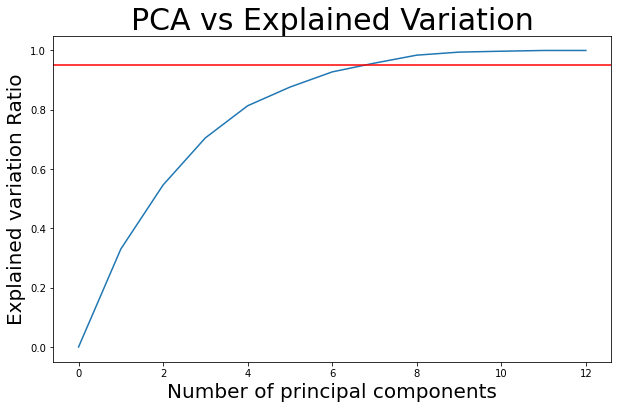

In [53]:
fig,ax = plt.subplots(figsize = (10,6))
pcas= list(range(0,13))
evr= []
for i in range(0,13):
    pca = PCA(n_components = i, random_state = 10)
    pca_model = pca.fit_transform(df1_scaled)
    evr.append(sum(pca.explained_variance_ratio_))
plt.plot(pcas,evr)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel("Number of principal components", fontsize = 20)
plt.ylabel("Explained variation Ratio", fontsize = 20)
plt.title("PCA vs Explained Variation", fontsize =30)
plt.show()

In [54]:
sum(pca.explained_variance_ratio_)

1.0

In [55]:
var_ratio={}
for i in range(1,13):
    pca = PCA(n_components = i,random_state=10)
    pca_model = pca.fit_transform(df1_scaled)
    var_ratio[i]=(sum(pca.explained_variance_ratio_))

In [56]:
var_ratio

{1: 0.33042485331130644,
 2: 0.5463875539093201,
 3: 0.7051754367228207,
 4: 0.8135161112502938,
 5: 0.8764434213829287,
 6: 0.9276878515368205,
 7: 0.9573273125434403,
 8: 0.9841980295576225,
 9: 0.9944172631862235,
 10: 0.9974657642754153,
 11: 1.0,
 12: 1.0}

<b>- Since 7 components are explaining about 95% variance so we select 6 components.

In [57]:
df1_scaled.shape

(8950, 12)

In [58]:
pc_final=PCA(n_components=7).fit(df1_scaled)

reduced_df1=pc_final.fit_transform(df1_scaled)

In [59]:
df1_final=pd.DataFrame(reduced_df1)

In [60]:
df1_final.head()

,0,1,2,3,4,5,6
0,-0.573897,2.381900,0.508158,-0.509306,0.175093,-0.218057,0.095394
1,-2.695724,-0.415220,-0.336505,1.282546,-0.353469,-0.496226,0.048126
2,1.319018,-2.147616,1.256475,-2.028271,-0.188766,-0.817593,1.648655
3,-0.852220,-1.428964,2.001050,-1.555814,1.265772,0.563486,-0.075481
4,-1.080840,-1.297400,1.107416,-1.515114,-0.173895,-0.777219,-1.193094


- <b>So initially we had 18 variables now there are 7 so our variables  have reduced

In [61]:
df1.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'limit_usage', 'payment_minpay',
       'both_oneoff_&_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [62]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(7)],index=df1.columns)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
BALANCE_FREQUENCY,0.058885,-0.177519,-0.485584,-0.237282,-0.448821,-0.526842,-0.011252
ONEOFF_PURCHASES,0.358474,-0.404527,0.103343,-0.050979,0.095921,0.094986,-0.130379
INSTALLMENTS_PURCHASES,0.372339,0.320507,-0.268603,0.046319,0.037140,0.149557,-0.147057
PURCHASES_FREQUENCY,0.430071,0.160758,-0.143649,-0.164224,-0.146825,0.024060,0.295223
ONEOFF_PURCHASES_FREQUENCY,0.353564,-0.334940,0.033885,-0.000645,-0.074503,-0.078128,0.579226
CASH_ADVANCE_FREQUENCY,-0.221088,-0.228402,-0.285641,0.127577,-0.405951,0.747264,0.209050
limit_usage,-0.180383,-0.243024,-0.461292,-0.287647,0.053092,0.055345,-0.438129
payment_minpay,0.202000,0.010692,0.257525,0.498278,-0.635428,-0.093385,-0.406357
both_oneoff_&_installment,0.378711,-0.152057,-0.262700,0.299190,0.329545,0.103756,-0.200438
installment,0.000953,0.559724,-0.012610,-0.292534,-0.228815,0.111022,0.067366


In [63]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(7)])

PC_0    0.330425
PC_1    0.215963
PC_2    0.158788
PC_3    0.108341
PC_4    0.062927
PC_5    0.051244
PC_6    0.029639
dtype: float64

### Clustering

In [64]:
from sklearn.cluster import KMeans

WCSS
 [102816.95336716567, 75482.24454382187, 53900.227520874454, 36571.441689422194, 32958.799354911025, 29363.469737643332, 26551.138980432086, 24329.380397814362, 21953.215735439146]


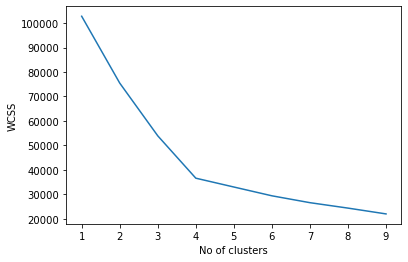

In [65]:
wcss = []
for i in range(1,10): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(df1_final)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,10)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
for i in range(2,10):
    m=KMeans(n_clusters=i).fit(df1_final)
    print(f'Silhouette Score at K={i}',silhouette_score(df1_final,m.labels_))

Silhouette Score at K=2 0.28950657051843065
Silhouette Score at K=3 0.36985094113218764
Silhouette Score at K=4 0.4665831723090207
Silhouette Score at K=5 0.41144049647764086
Silhouette Score at K=6 0.40632982317564104
Silhouette Score at K=7 0.38754055503138335
Silhouette Score at K=8 0.36208013331659
Silhouette Score at K=9 0.3718835062105665


- <b> Optimal value at K=4 as silhouette score highest and closest to 1. Also, in primary analysis we made 4 categories. 

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

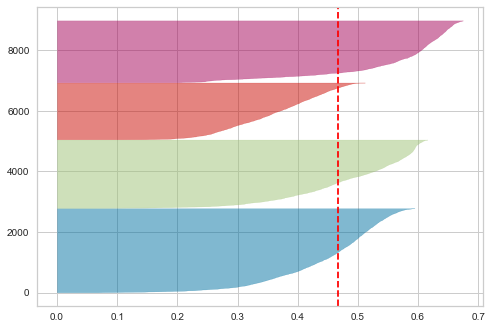

In [69]:
m2=KMeans(n_clusters=4)
visualizer=SilhouetteVisualizer(m2,colors='yellowbrick')
visualizer.fit(df1_final)
plt.show()

In [70]:
from collections import Counter

In [71]:
ypred2=m2.predict(df1_final)
c1=Counter(ypred2)
print(c1)

Counter({0: 2774, 1: 2260, 3: 2042, 2: 1874})


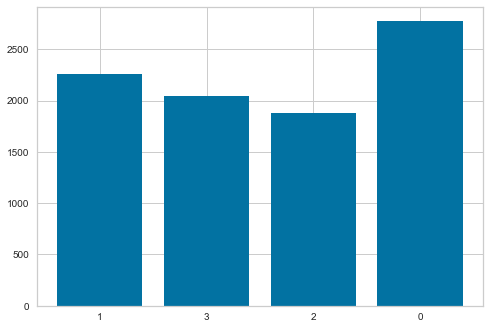

In [72]:
data = c1
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

### Applying KMeans at K=4

In [73]:
k4= KMeans(n_clusters=4)
k4.fit(df1_final)
ypred4=k4.predict(df1_final)
print(ypred4)

[0 2 1 ... 0 2 1]


In [74]:
labels4= k4.labels_
print(labels4)

[0 2 1 ... 0 2 1]


In [75]:
cent4= k4.cluster_centers_
print(cent4)

[[ 0.00649839  2.49570347 -0.04134182 -0.65434699 -0.29727841  0.11746166
   0.04122405]
 [-0.21617898 -1.65109045  1.69561553 -1.16546995 -0.24274433  0.08008937
  -0.08928709]
 [-2.85257561 -0.44812476 -0.49572141  1.0053438   0.04737553 -0.33283036
   0.18082106]
 [ 2.24058848 -0.58798687 -0.74689541  0.58039035  0.37130903  0.09520143
  -0.10637309]]


In [76]:
df1_pair_plot=pd.DataFrame(reduced_df1,columns=['PC_' +str(i) for i in range(7)])

In [77]:
df1_pair_plot['Cls4']=ypred4
df1_pair_plot.head(10)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Cls4
0,-0.573897,2.381900,0.508158,-0.509306,0.175093,-0.218057,0.095394,0
1,-2.695724,-0.415220,-0.336505,1.282546,-0.353469,-0.496226,0.048126,2
2,1.319018,-2.147616,1.256475,-2.028271,-0.188766,-0.817593,1.648655,1
3,-0.852220,-1.428964,2.001050,-1.555814,1.265772,0.563486,-0.075481,1
4,-1.080840,-1.297400,1.107416,-1.515114,-0.173895,-0.777219,-1.193094,1
5,-0.239809,2.093509,-1.584552,-1.848880,0.168270,-0.221862,-0.620888,0
6,4.009873,-0.934967,0.312912,1.682406,-1.002151,-0.737742,0.290994,3
7,0.072151,2.197158,-1.266601,-1.638925,-0.226515,-0.323830,-0.341443,0
8,1.422991,-0.229265,-0.370910,0.520928,1.042041,-0.402184,-0.734887,3
9,0.171630,-1.074997,3.399784,0.072043,-0.263681,0.051287,-0.726382,1


### Clustering Result

In [78]:
res=df1_pair_plot.iloc[:,:].groupby(['Cls4']).mean().T
res

Cls4,0,1,2,3
PC_0,0.006498,-0.216179,-2.852576,2.240588
PC_1,2.495703,-1.651090,-0.448125,-0.587987
PC_2,-0.041342,1.695616,-0.495721,-0.746895
PC_3,-0.654347,-1.165470,1.005344,0.580390
PC_4,-0.297278,-0.242744,0.047376,0.371309
PC_5,0.117462,0.080089,-0.332830,0.095201
PC_6,0.041224,-0.089287,0.180821,-0.106373
